# Correlation in Time Series

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime

Correlation is a measure of the direction and strength of a relationship. In this case, we are looking at two time series. Measurements are from -1 to 1 with 0 meaning no relationship or zero correlation between the two series.  1 means a perfect, positive correlation, and -1 means a perfect, negative correlation.  High correlations are toward 1 or -1 whereas low correlations are toward 0. In time series, one must be cautioned when viewing correlation, given the time period. You can imagine that on one day, there is strong, positive correlation but that the very next day, it could be a different story about the relationship between the two series.

Let's go through some examples of low, medium, and high correlations that are both positive and negative. We will use some simple examples.

## Low Correlation

### Google trends of "freedom" and "choice"

In [0]:
# Read in data
# https://trends.google.com/trends/?geo=US , google trends, search the word "freedom" and "choice"
freedom_choice = pd.read_csv("freedom_choice.csv", skiprows=1)

In [3]:
freedom_choice.head()

,Week,freedom: (United States),choice: (United States)
0,2014-10-12,44,45
1,2014-10-19,45,46
2,2014-10-26,46,45
3,2014-11-02,49,47
4,2014-11-09,50,46


In [0]:
col_names = ['Week','freedom', 'choice']
freedom_choice.columns = col_names

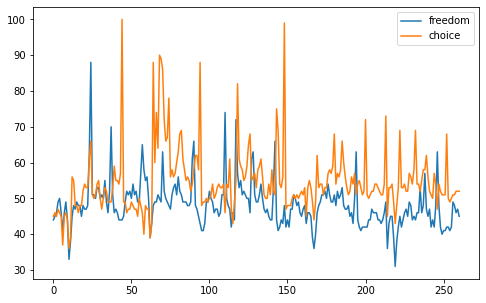

In [5]:
freedom_choice.plot(figsize=(8,5))

In [0]:
freedom_choice['Week'] = pd.to_datetime(freedom_choice['Week'], infer_datetime_format=True )

In [0]:
freedom_choice.set_index('Week', inplace=True)

In [8]:
freedom_choice.head()

,freedom,choice
Week,,
2014-10-12,44,45
2014-10-19,45,46
2014-10-26,46,45
2014-11-02,49,47
2014-11-09,50,46


In [9]:
# Perform correlation
freedom_choice['freedom'].corr(freedom_choice['choice'])

0.15326158201930443

## Medium Correlation

### Adjusted Close Stock Prices for Bank of America and J.P. Morgan

In [10]:
# Bank of America example
df_bac = pd.read_csv("df_bankofamerica.csv", parse_dates=['Date'], index_col=0)
# JP Morgan example
df_jpm = pd.read_csv("df_jpmorgan.csv", parse_dates=['Date'], index_col=0)
df_jpm.head()

,Adj Close Price
Date,
1990-01-02,3.610043
1990-01-03,3.730377
1990-01-04,3.745418
1990-01-05,3.760463
1990-01-08,3.760463


In [0]:
frames = [df_bac, df_jpm]
banks = pd.concat(frames, axis=1)

In [12]:
banks.head()

,Adj Close Price,Adj Close Price
Date,,
1990-01-02,1.711862,3.610043
1990-01-03,1.725632,3.730377
1990-01-04,1.688917,3.745418
1990-01-05,1.652200,3.760463
1990-01-08,1.661379,3.760463


In [13]:
col_names = ['bac_closeprice', 'jpm_closeprice']
banks.columns = col_names
banks.head()

,bac_closeprice,jpm_closeprice
Date,,
1990-01-02,1.711862,3.610043
1990-01-03,1.725632,3.730377
1990-01-04,1.688917,3.745418
1990-01-05,1.652200,3.760463
1990-01-08,1.661379,3.760463


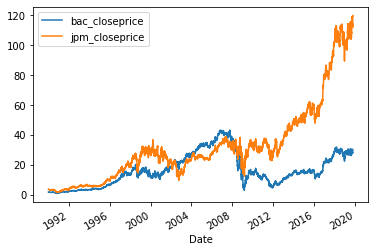

In [14]:
banks.plot()

In [15]:
banks['bac_closeprice'].corr(banks['jpm_closeprice'])

0.48357538969394315

### Rolling Window of Correlations

![alt text](https://www.business-science.io/assets/rolling-corr-explanation.png)

In [0]:
banks['bac_closeprice'].rolling(window=6).corr(banks['jpm_closeprice']).head(50)

Date
1990-01-02         NaN
1990-01-03         NaN
1990-01-04         NaN
1990-01-05         NaN
1990-01-08         NaN
1990-01-09   -0.295338
1990-01-10    0.442023
1990-01-11    0.746380
1990-01-12    0.797359
1990-01-15    0.788352
1990-01-16    0.860473
1990-01-17    0.614086
1990-01-18    0.270300
1990-01-19   -0.691784
1990-01-22   -0.537018
1990-01-23   -0.651942
1990-01-24   -0.586375
1990-01-25   -0.474303
1990-01-26    0.549745
1990-01-29    0.717175
1990-01-30    0.966896
1990-01-31    0.970695
1990-02-01    0.908626
1990-02-02    0.816985
1990-02-05    0.727252
1990-02-06    0.732162
1990-02-07    0.491262
1990-02-08    0.788370
1990-02-09    0.750273
1990-02-12    0.401466
1990-02-13    0.181370
1990-02-14    0.722304
1990-02-15    0.949791
1990-02-16    0.961563
1990-02-20    0.860645
1990-02-21    0.762145
1990-02-22    0.172076
1990-02-23    0.219319
1990-02-26    0.203912
1990-02-27   -0.472087
1990-02-28   -0.460020
1990-03-01   -0.246647
1990-03-02    0.417032
1990-0

In [16]:
# Calculate rolling window of correlation
banks['bac_closeprice'].rolling(window=6).corr(banks['jpm_closeprice']).tail(50)

Date
2019-08-07    0.990664
2019-08-08    0.982003
2019-08-09    0.976365
2019-08-12    0.954119
2019-08-13    0.824910
2019-08-14    0.950340
2019-08-15    0.970285
2019-08-16    0.944658
2019-08-19    0.908134
2019-08-20    0.952658
2019-08-21    0.953390
2019-08-22    0.982858
2019-08-23    0.974054
2019-08-26    0.975664
2019-08-27    0.975332
2019-08-28    0.974800
2019-08-29    0.984820
2019-08-30    0.990319
2019-09-03    0.982095
2019-09-04    0.984344
2019-09-05    0.979902
2019-09-06    0.940763
2019-09-09    0.971785
2019-09-10    0.979876
2019-09-11    0.975871
2019-09-12    0.974525
2019-09-13    0.988001
2019-09-16    0.970663
2019-09-17    0.965367
2019-09-18    0.927700
2019-09-19    0.753383
2019-09-20    0.538430
2019-09-23    0.368496
2019-09-24    0.857796
2019-09-25    0.994708
2019-09-26    0.948718
2019-09-27    0.890823
2019-09-30    0.833329
2019-10-01    0.935323
2019-10-02    0.986856
2019-10-03    0.991700
2019-10-04    0.986584
2019-10-07    0.988812
2019-1

## High Correlation

### Google Trend in "growth" and "economy"

In [0]:
# Read in data
# https://trends.google.com/trends/?geo=US , google trends, search the word "growth" and "economy"
growth_economy = pd.read_csv("growth_economy.csv", skiprows=1)

In [18]:
growth_economy.head()

,Week,growth: (United States),economy: (United States)
0,2019-01-06,90,51
1,2019-01-13,96,54
2,2019-01-20,93,54
3,2019-01-27,98,54
4,2019-02-03,98,56


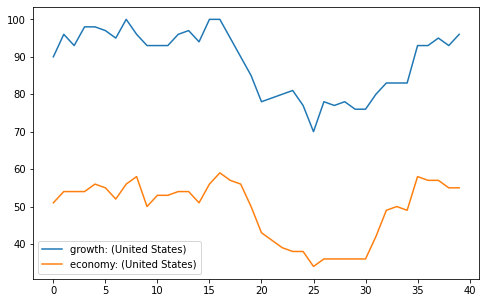

In [19]:
growth_economy.plot(figsize=(8,5))

In [0]:
col_names = ['Week', 'growth', 'economy']
growth_economy.columns = col_names

In [21]:
growth_economy.head()

,Week,growth,economy
0,2019-01-06,90,51
1,2019-01-13,96,54
2,2019-01-20,93,54
3,2019-01-27,98,54
4,2019-02-03,98,56


In [22]:
# Calculate correlation
growth_economy['growth'].corr(growth_economy['economy'])

0.9279092781100563


**Autocorrelation**
Much like correlation, autocorrelation gives a measure of the strength and direction of a relationship between two time series. Autocorrelation is done with a variable and its lag. It's a correlation with itself, hence autocorrelation. Basically, you are using the same time series and creating a second series, which is shifted by a time step. It is common to use the autocorrelation (ACF) plot to visualize the autocorrelation of a time-series.Let's start by taking a look at white noise.

**White Noise**
If your time series is statististically uncorrelated (independent) with zero mean and constant variance, then you have a particular type of noise called white nois

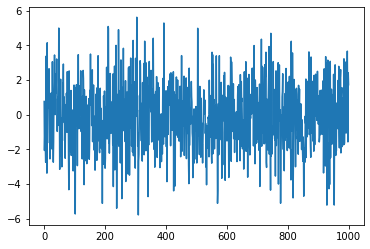

In [24]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plot
import numpy as np


# loc is mean, scale is standard deviation
white_noise = np.random.normal(loc=0, scale=2, size=1000)

# plot white noise
plot.plot(white_noise)

In [25]:
print(white_noise.mean())

white_noise.std()

-0.06129170608092724


1.8633189996947501

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


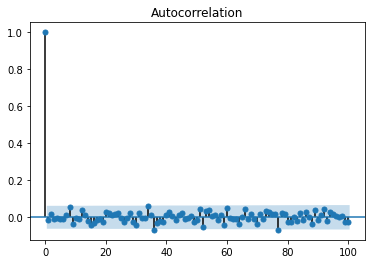

In [26]:
# Plot Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
# Example of white noise autocorrelation (serial correlation) 
plot_acf(white_noise, lags=100);


all the lags have close to zero autocorrelation so this means that lagged values cannot be used in prediction. All the lagged variables are random and are not useful for prediction.//

In [29]:
vacation = pd.read_csv("df_vacation.csv", index_col='Month', parse_dates=True)
vacation.head()

,Num_Search_Vacation
Month,
2004-01-01,94
2004-02-01,89
2004-03-01,86
2004-04-01,79
2004-05-01,89


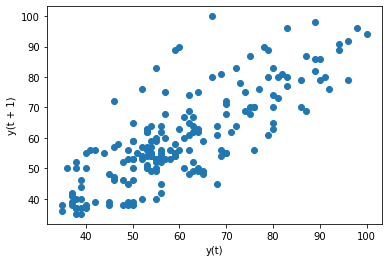

In [30]:
# Lag Plot
from pandas.plotting import lag_plot

lag_plot(vacation)
plot.show()


The plot above shows the vacation data on the y(t) against its previous time step, prior month, the the y(t+1). You can think of the data shifted by a month and then plotted, removing the first data point. Clearly, we see a positive relationship, though it is has a broader range of scatter.

In [32]:
# Autocorrelation
autocorrelation = vacation['Num_Search_Vacation'].autocorr()
print("The autocorrelation is: %4.2f" %(autocorrelation))

The autocorrelation is: 0.80


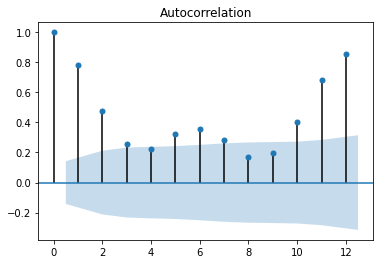

In [33]:
# Plot ACF to visualize the autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(vacation['Num_Search_Vacation'], lags=12);

The partial autocorrelation function (PACF) gives the partial correlation of a time series with its own lagged values. It controls for other lags. The idea for the PACF is that we perform correlation between a variable and itself lagged and then we subtract that effect from the variable and then find out what residual correlation is left over from that variable and further lags. For example, a PACF of order 3 returns the correlation between our time series (t1, t2, t3, ...) and its own values lagged by 3 time points (t4, t5, t6, ...), but only after removing all effects attributable to lags 1 and 2

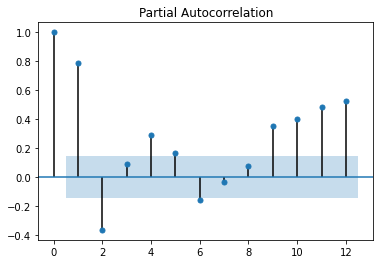

In [34]:
# Plot Partial autocorrelation function (PACF)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(vacation['Num_Search_Vacation'], lags=12);


If partial autocorrelation values are close to 0, then values between observations and lagged observations are not correlated with one another. Inversely, partial autocorrelations with values close to 1 or -1 indicate that there exists strong positive or negative correlations between the lagged observations of the time series.

The .plot_pacf() function also returns confidence intervals, which are represented as blue shaded regions. If partial autocorrelation values are beyond this confidence interval regions, then you can assume that the observed partial autocorrelation values are statistically significant.